# UYG332 Image Processing Final Project
Prepared by: ERDEM BAKIRCI - B2180.060051

## Problem 1 – tf2_engineer.jpg

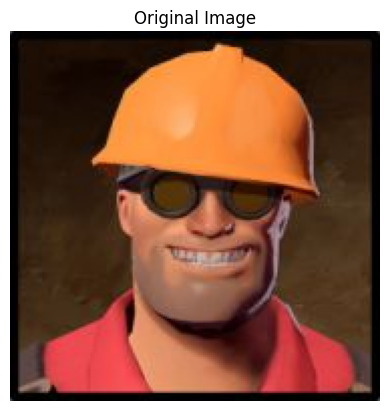

Image center (y, x): (92, 92)
Center intensity value (BGR): [ 67  92 172]
Patch center intensity value (BGR): [ 50 158 168]


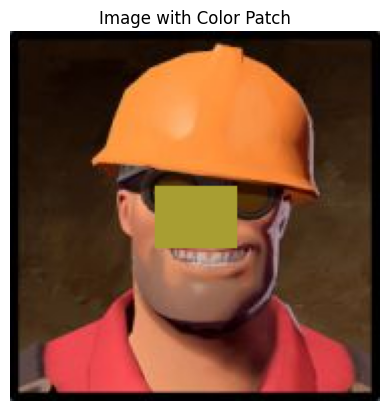

In [5]:

import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('imagefinal/tf2_engineer.jpg')
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

yc, xc = img1.shape[0] // 2, img1.shape[1] // 2
print("Image center (y, x):", (yc, xc))
print("Center intensity value (BGR):", img1[yc, xc])

cv2.rectangle(img1, (xc - 20, yc - 15), (xc + 20, yc + 15), (0x32, 0x9e, 0xa8), -1)
print("Patch center intensity value (BGR):", img1[yc, xc])
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("Image with Color Patch")
plt.axis("off")
plt.show()


## Problem 2 – einstein.tif

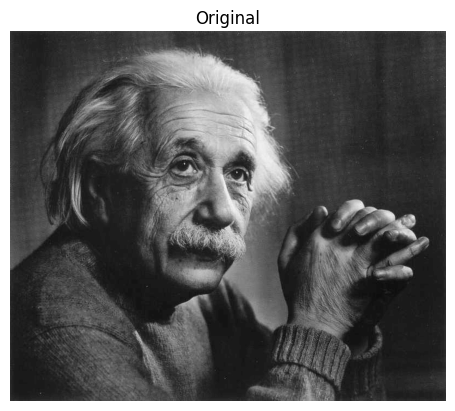

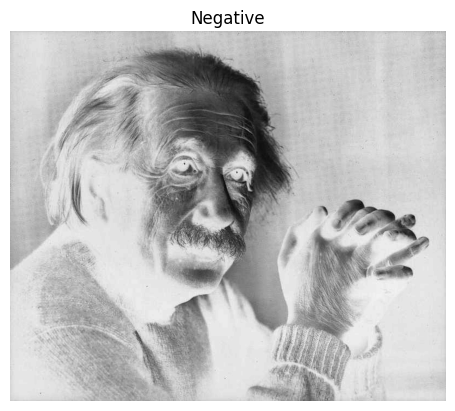

Pixel (455,634) → Original: 116 | Negative: 139
Pixel (555,81) → Original: 108 | Negative: 147
Pixel (673,662) → Original: 104 | Negative: 151
Pixel (438,154) → Original: 100 | Negative: 155
Pixel (519,276) → Original: 96 | Negative: 159


In [6]:

img2 = cv2.imread('imagefinal/einstein.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(img2, cmap='gray')
plt.title("Original")
plt.axis("off")
plt.show()

img2_neg = 255 - img2
plt.imshow(img2_neg, cmap='gray')
plt.title("Negative")
plt.axis("off")
plt.show()

import numpy as np
h, w = img2.shape
for _ in range(5):
    y, x = np.random.randint(0, h), np.random.randint(0, w)
    print(f"Pixel ({y},{x}) → Original: {img2[y,x]} | Negative: {img2_neg[y,x]}")


## Problem 3 – pout.tif

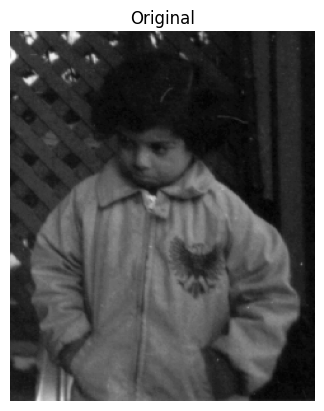

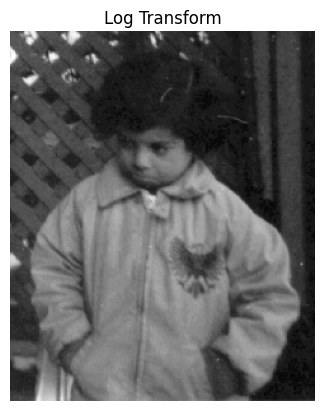

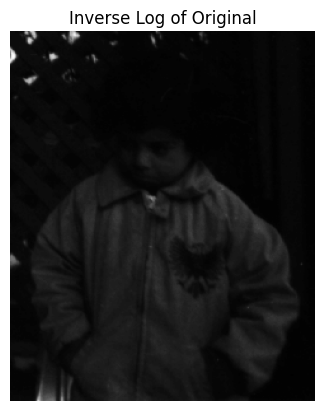

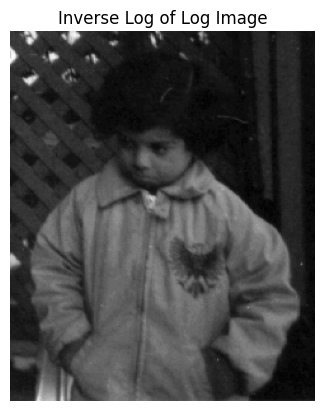

In [7]:

img3 = cv2.imread('imagefinal/pout.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(img3, cmap='gray')
plt.title("Original")
plt.axis("off")
plt.show()

img3_log = (np.log1p(img3.astype(np.float32)) * 255 / np.log(256)).astype(np.uint8)
plt.imshow(img3_log, cmap='gray')
plt.title("Log Transform")
plt.axis("off")
plt.show()

img3_ilog = ((np.exp(img3 / 255 * np.log(256)) - 1)).astype(np.uint8)
plt.imshow(img3_ilog, cmap='gray')
plt.title("Inverse Log of Original")
plt.axis("off")
plt.show()

img3_ilog_log = ((np.exp(img3_log / 255 * np.log(256)) - 1)).astype(np.uint8)
plt.imshow(img3_ilog_log, cmap='gray')
plt.title("Inverse Log of Log Image")
plt.axis("off")
plt.show()


## Problem 4 – moon.tif

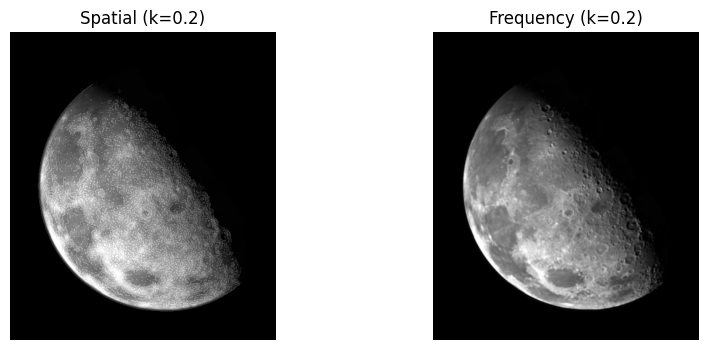

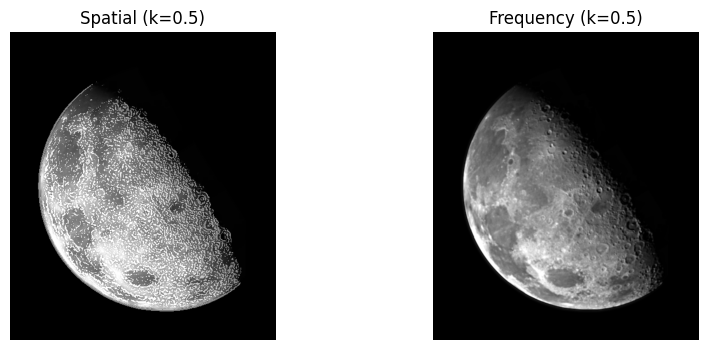

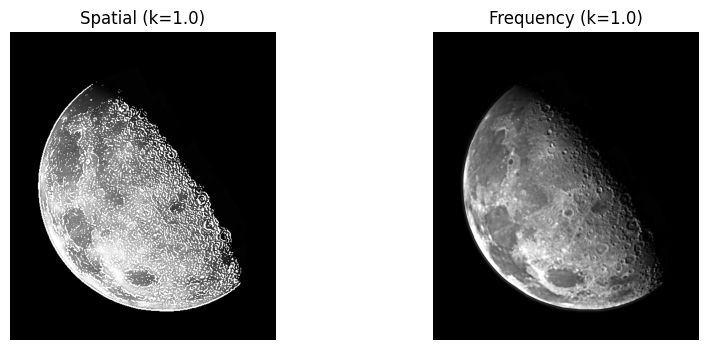

In [8]:

from scipy.ndimage import gaussian_filter
from numpy.fft import fft2, ifft2, fftshift

img4 = cv2.imread('imagefinal/moon.tif', cv2.IMREAD_GRAYSCALE)

def unsharp_spatial(img, k):
    blur = gaussian_filter(img, sigma=1)
    mask = img - blur
    return np.clip(img + k * mask, 0, 255).astype(np.uint8)

def unsharp_freq(img, k, D0=30):
    f = fft2(img)
    fshift = fftshift(f)
    M, N = img.shape
    u = np.arange(M) - M//2
    v = np.arange(N) - N//2
    V, U = np.meshgrid(v, u)
    D = np.sqrt(U**2 + V**2)
    H = 1 + k * (1 - np.exp(-(D**2) / (2 * (D0**2))))
    G = H * fshift
    return np.clip(np.abs(ifft2(np.fft.ifftshift(G))), 0, 255).astype(np.uint8)

for k in [0.2, 0.5, 1.0]:
    spatial = unsharp_spatial(img4, k)
    freq = unsharp_freq(img4, k)
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].imshow(spatial, cmap='gray')
    axs[0].set_title(f"Spatial (k={k})")
    axs[0].axis("off")
    axs[1].imshow(freq, cmap='gray')
    axs[1].set_title(f"Frequency (k={k})")
    axs[1].axis("off")
    plt.show()


## Problem 5 – pcb.tif

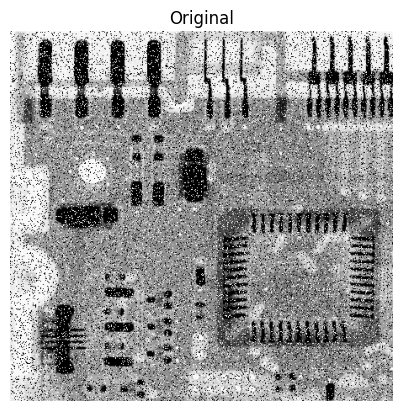

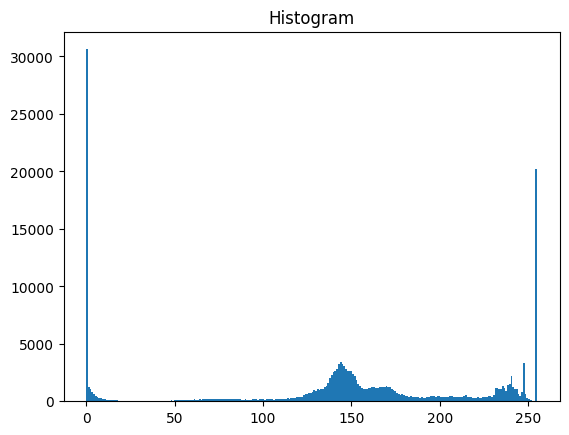

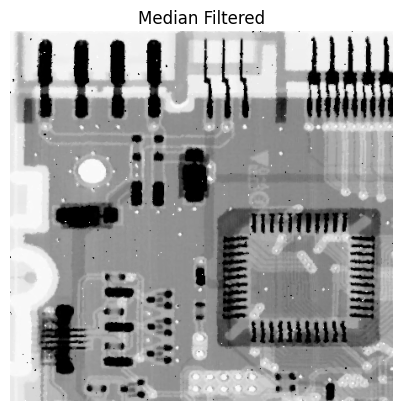

In [9]:

img5 = cv2.imread('imagefinal/pcb.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(img5, cmap='gray')
plt.title("Original")
plt.axis("off")
plt.show()

plt.hist(img5.ravel(), bins=256)
plt.title("Histogram")
plt.show()

denoised = cv2.medianBlur(img5, 3)
plt.imshow(denoised, cmap='gray')
plt.title("Median Filtered")
plt.axis("off")
plt.show()


## Problem 6 – pollen.tif

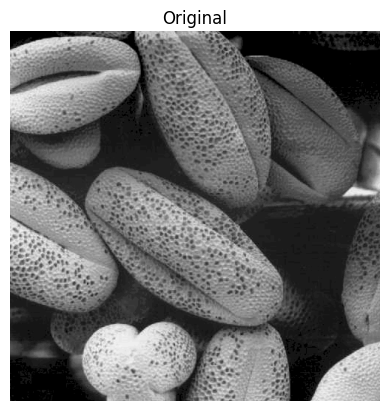

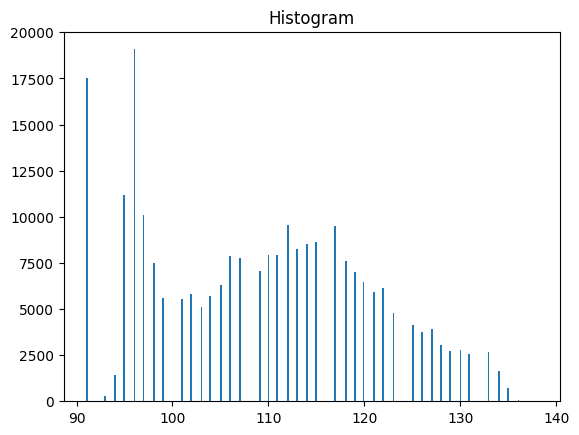

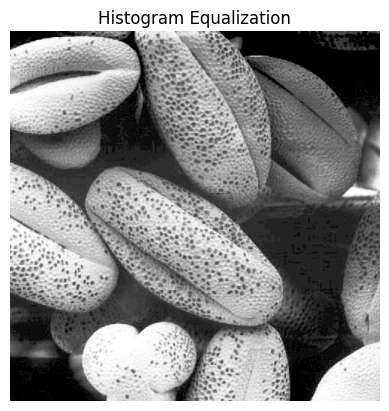

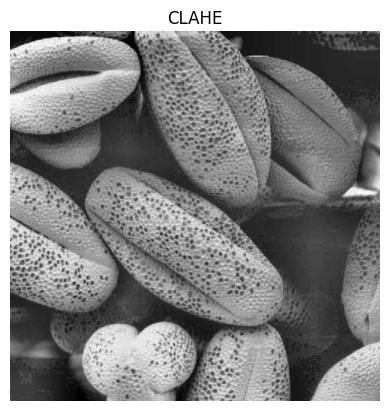

In [10]:

img6 = cv2.imread('imagefinal/pollen.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(img6, cmap='gray')
plt.title("Original")
plt.axis("off")
plt.show()

plt.hist(img6.ravel(), bins=256)
plt.title("Histogram")
plt.show()

eq1 = cv2.equalizeHist(img6)
plt.imshow(eq1, cmap='gray')
plt.title("Histogram Equalization")
plt.axis("off")
plt.show()

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
eq2 = clahe.apply(img6)
plt.imshow(eq2, cmap='gray')
plt.title("CLAHE")
plt.axis("off")
plt.show()
